In [3]:
# DATA SCIENCE:
# library to use: 
#            pandas->used for Data Analysis/Data wrangling->reading and preparation
#            Graphs-> seaborn,matplotid

import pandas
import  matplotlib.pyplot as plt
import seaborn

data = pandas.read_csv('data/bank.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# DATA ANALYSIS with pandas
# 1.Statistics
#  describe()

# Types of data 
# Continous data ->Numeric data in fractions e.temperature ,sales...
# discrete data ->Numeric data in whole number ->year
# categorical data-> data in textual formate.e Gender (male,female,other)

data.describe()





,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#  check for empty records 
# isnull().sum()


array =data.values
array 

X = array[0:50, 0:8]
Y  = array[:, 8]
Y

array([nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0, 168.0, 349.0,
       70.0, 109.0, 200.0, 114.0, 17.0, 125.0, 100.0, 76.0, 133.0, 115.0,
       104.0, 315.0, 116.0, 112.0, 151.0, 191.0, 122.0, 110.0, 35.0,
       120.0, 201.0, 74.0, 106.0, 114.0, 320.0, nan, 100.0, 144.0, 184.0,
       110.0, 80.0, 47.0, 75.0, 134.0, 96.0, 88.0, 44.0, 144.0, 120.0,
       144.0, 100.0, 120.0, 112.0, 134.0, 286.0, 97.0, 96.0, 135.0, 180.0,
       144.0, 120.0, 99.0, 165.0, nan, 116.0, 258.0, 126.0, 312.0, 125.0,
       136.0, 172.0, 97.0, 81.0, 95.0, 187.0, 113.0, 176.0, 110.0, 180.0,
       130.0, 111.0, nan, 167.0, 265.0, 50.0, 136.0, 99.0, 104.0, 210.0,
       175.0, 131.0, 188.0, 81.0, 122.0, 25.0, nan, 137.0, 50.0, 115.0,
       131.0, 133.0, 151.0, nan, nan, 160.0, 100.0, 225.0, 120.0, 216.0,
       94.0, 136.0, 139.0, 152.0, nan, 118.0, 185.0, 154.0, 85.0, 175.0,
       259.0, 180.0, 44.0, 137.0, 81.0, 194.0, 93.0, 370.0, nan, 160.0,
       182.0, 650.0, 74.0, 70.0, 25.0, 102.0, 290.0, 

In [9]:
# step 2 :Spiliting the Dateset(x,y) into Training set (70%) and testing set (30%)
# X -> X-train x-train,X_ test
# Y-> Y_train, Y_test
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [50, 614]

In [10]:
# filling Empties - categorical (Unknown)

# fillna('Unknown',inplace = True)
# haed()->first number of records
# tail()->last number of records

data['Gender'].fillna('Unknown', inplace = True)
data.groupby("Gender").size()

Gender
Female     112
Male       489
Unknown     13
dtype: int64

In [ ]:
# Filling  Empties -Countinous Data (mean ,mode ,madeian)
# loan Amountt -mean

meanLA = data ['LoanAmount'].mean()
data['LoanAmount'].fillna(meanLA,inplace=True)
data.isnull().sum()


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# DATA VISUALIZATION -> seaborn
# MS POWERBI
# TABLEAU DESKTOP

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("seaborn")

C:\Users\steve\AppData\Local\Temp\ipykernel_9556\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Axes: >

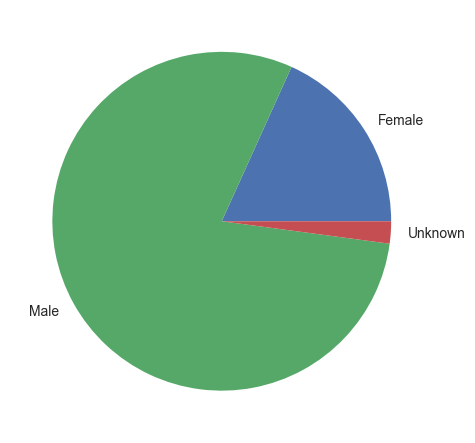

In [ ]:
#  PIE CHART ->Visualize categorical variables

data.groupby('Gender').size().plot(kind = 'pie')


In [ ]:
# disribution of a  categorical variable
# scatter plot 

seaborn.scatterplot(x='LoanAmount', y='Applicantincome', data = data )

NameError: name 'seaborn' is not defined